In [11]:
from pathlib import Path
from pprint import pprint

import pygraphviz as pgv
from anytree import AsciiStyle, Node, PreOrderIter, RenderTree
from IPython.display import Image

from utils import load_budget

In [12]:
budget = load_budget()
budget.head()

/home/iyed/Projects/budget_validation/data/saisie_db - budget_type.parquet is created
/home/iyed/Projects/budget_validation/data/saisie_db - budget_by_type.parquet is created


,budget_type_parent_name,value,extra,year,organization_name,budget_type_name
0,نفقات التنمية,1.359,NaN,2016,وزارة التكوين المهني و التشغيل,الاسنثمارات المباشرة
1,نفقات التنمية,188.493,NaN,2016,وزارة التربية,الاسنثمارات المباشرة
2,نفقات التنمية,146.393,NaN,2016,وزارة التعليم العالي و البحث العلمي,الاسنثمارات المباشرة
3,نفقات التنمية,270.000,NaN,2016,وزارة الداخلية,الاسنثمارات المباشرة
4,نفقات التنمية,1.949,NaN,2016,وزارة الشؤون الدينية,الاسنثمارات المباشرة


In [13]:
budget19 = budget[budget.year == 2019]
t = budget19[budget19.organization_name == "وزارة النقل"].pipe(
    lambda df: df.assign(
        budget_type_parent_name=df["budget_type_parent_name"].fillna("ميزانية الوزارة")
    )
)

In [14]:
tree = to_tree(t)
root = tree.popitem()[1].root

In [15]:
for node in root.descendants:
    if len(node.children) > 0:
        node.gap = np.round(node.value - sum([c.value for c in node.children]), 3)

In [16]:
print(RenderTree(root, style=AsciiStyle()))

Node('/ميزانية الدولة')
+-- Node('/ميزانية الدولة/ميزانية الوزارة', gap=0.0, value=621.705)
    |-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التصرف', gap=0.0, value=471.705)
    |   |-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التصرف/التأجير العمومي', value=17.843)
    |   |-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التصرف/التدخل العمومي', value=450.823)
    |   +-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التصرف/وسائل المصالح', value=3.039)
    +-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التنمية', gap=0.0, value=150.0)
        |-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التنمية/الاسنثمارات المباشرة', gap=0.0, value=1.84)
        |   |-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التنمية/الاسنثمارات المباشرة/مشاريع بصدد الانجاز (ا م)', value=1.5)
        |   +-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التنمية/الاسنثمارات المباشرة/مشاريع جديدة (ا م)', value=0.34)
        +-- Node('/ميزانية الدولة/ميزانية الوزارة/نفقات التنمية/التمويل العمومي', gap=0.0, value=14

In [8]:
g = pgv.AGraph(strict=False, directed=True)

In [9]:
for node in PreOrderIter(root):
    if node.is_root:
        g.add_node(node.name)
    else:
        g.add_edge(node.parent.name, node.name)

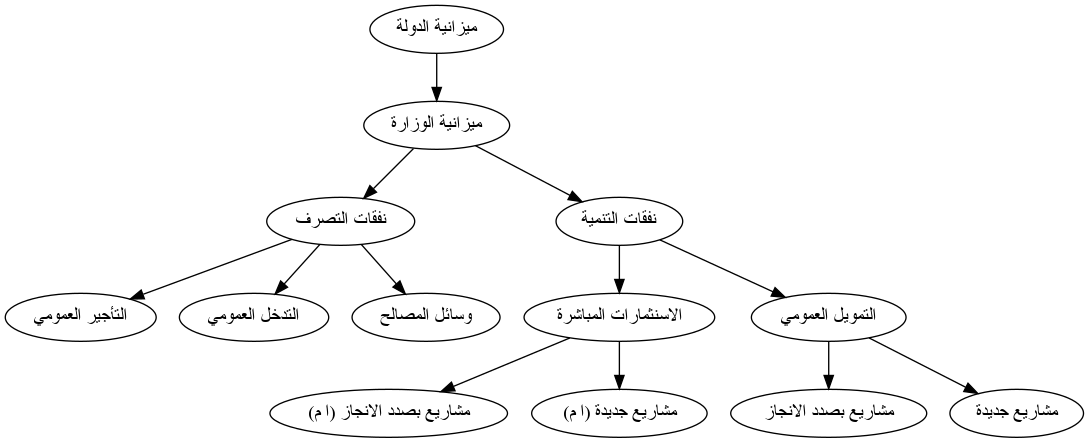

In [10]:
g.layout("dot")
g.draw("./draw.png")
Image(filename="./draw.png")